# Harmonic oscillator in 1d

In [5]:
import numpy as np
from fft_tdse.simulator import *
from fft_tdse.animator import *
import matplotlib.colors as colors
import matplotlib.pyplot as plt

In [6]:
x_min = -25.0
x_max = 25.0
nx = 2048

# eigenfunctio number
state_nx = 1

# def potential(x):
#     V = -0.5 * (x*x + 0.25)**(-.5)
#     return V



def potential(x):
    V = x*x/2
    V_cut = 10
    return V_cut * (V > V_cut) + V * (V < V_cut)

# recurrence relation for Hermite functions
def hermite(n, x):
    g = np.exp(-x**2 / 2.0)
    if n == 0:
        return np.ones_like(x) * np.pi ** (-0.25) * g
    elif n == 1:
        return 2 * (2.0 * np.pi**.5) ** (-.5) * x * g
    else:
        return (2.0/n)**.5 * x * hermite(n-1, x) - ((n-1.0)/n)**.5 * hermite(n-2, x)
    





ic| message: 'Dimension set to 1'
ic| 'Time grid:'
ic| self.t0: 0.0, self.t1: 100.0, self.n_steps: 4000
ic| message: 'Initial condition set.'
ic| self.initial_psi_fun: <function <lambda> at 0x107374040>
ic| hasattr(self, 'gs'): False


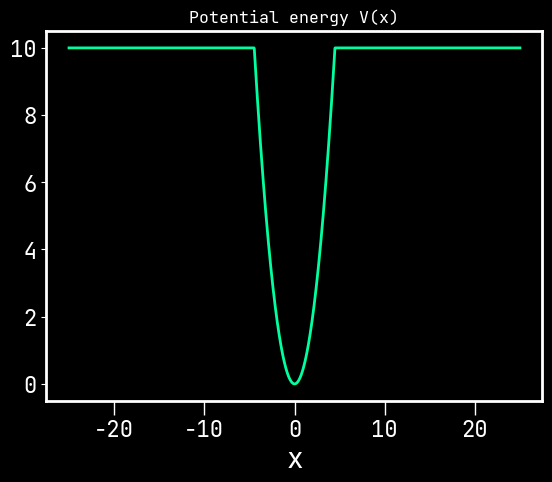

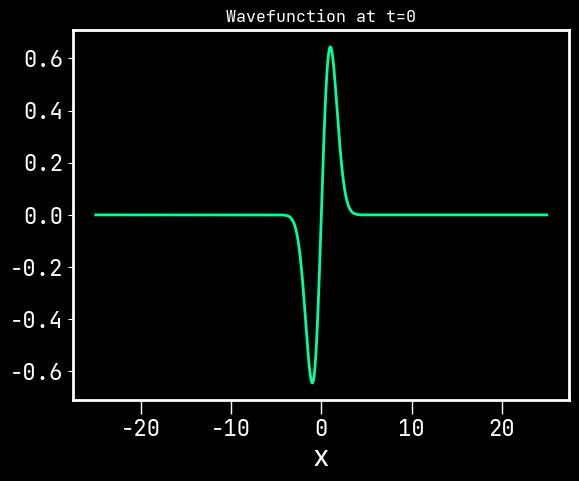

In [7]:
sim = Simulator(verbose=True)
sim.set_dimension(1)
sim.set_potential(potential)
sim.set_grid(x_min, x_max, nx)
sim.set_time_parameters(0.0, 100.0, 4000)
#sim.ground_state_guess =  sim.x * np.exp(-sim.x**2/2)
sim.set_initial_condition(lambda x: hermite(state_nx, x))
sim.prepare()
#sim.wf.setPsi(sim.wf.psi * np.exp(1j*sim.x))

plt.figure()
plt.plot(sim.x,potential(sim.x))
plt.xlabel('x')
plt.title('Potential energy V(x)')
plt.show()

plt.figure()
plt.plot(sim.x,sim.psi.real)
plt.xlabel('x')
plt.title('Wavefunction at t=0')
plt.show()


ic| self.name: 'ho_1d_1'
ic| self.folder: './ho_1d_1_frames/'
ic| self.fig_width_pixels: 800
    self.fig_height_pixels: 600
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 80.0
ic| self.format: './ho_1d_1_frames/frame%06d.png'
ic| self.fig_width_pixels: 1024
    self.fig_height_pixels: 768
    self.fig_width: 10
    self.fig_height: 7.5
    self.dpi: 102.4
ic| 'inside mpl_style'
ic| self.caption_font: <matplotlib.font_manager.FontProperties object at 0x125d62470>
ic| 'Running simulation...'


  0%|          | 0/4000 [00:00<?, ?it/s]

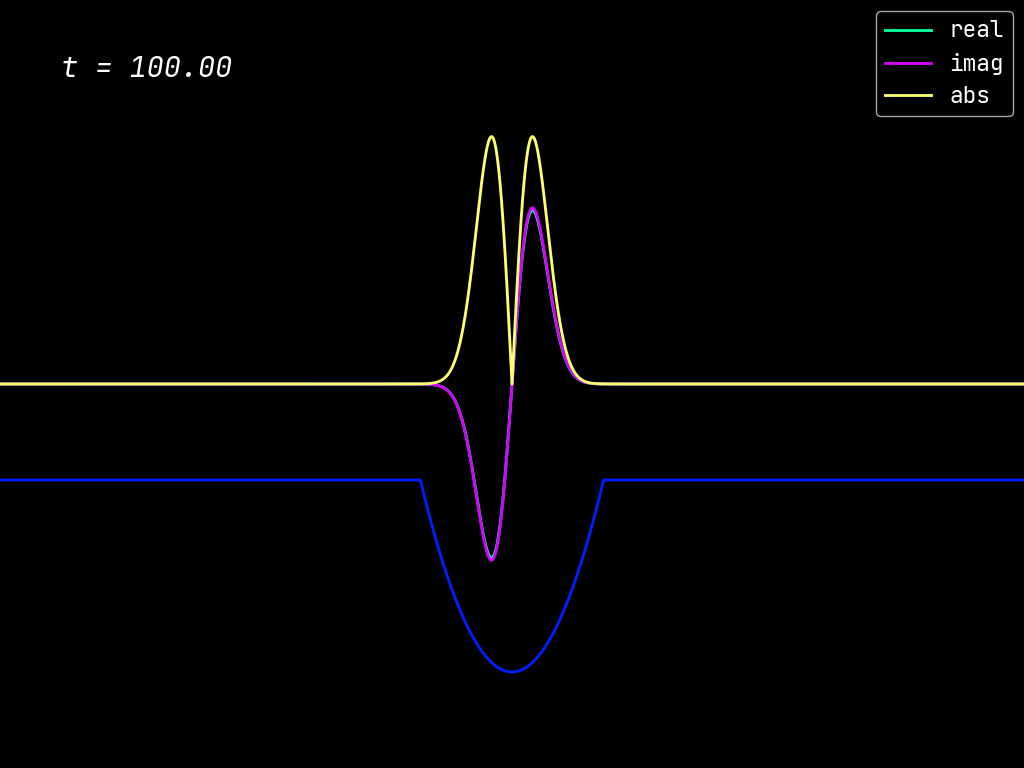

ic| len(self.frame_list): 401
ic| 'making movie ...'
ic| filename: 'ho_1d_1.mp4'
ffmpeg version N-111795-g95433eb3aa-tessus  https://evermeet.cx/ffmpeg/  Copyright (c) 2000-2023 the FFmpeg developers
  built with Apple clang version 11.0.0 (clang-1100.0.33.17)
  configuration: --cc=/usr/bin/clang --prefix=/opt/ffmpeg --extra-version=tessus --enable-avisynth --enable-fontconfig --enable-gpl --enable-libaom --enable-libass --enable-libbluray --enable-libdav1d --enable-libfreetype --enable-libgsm --enable-libmodplug --enable-libmp3lame --enable-libmysofa --enable-libopencore-amrnb --enable-libopencore-amrwb --enable-libopenh264 --enable-libopenjpeg --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvmaf --enable-libvo-amrwbenc --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx264 --enable-libx265 --enable-libxavs --enable-libxml2 --enable-libxv

In [8]:
name = f'ho_1d_{state_nx}'
anim = Animator1d(sim, name = name)
anim.set_style(DarkTheme())
anim.show_axis = False
anim.set_interval(10)
anim.set_framesize(1024, 768)
anim.set_preview(True, 10)

anim_callback = anim.get_callback()

def callback(sim):
    anim_callback(sim)
    
sim.simulate(callback=callback)
anim.make_movie()
anim.clean_frames()
